In [ ]:
# Import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns

!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp
import statsmodels.api as sm
from statsmodels.stats.power import Power
from scipy.stats import chi2_contingency

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Research Question 1: Does area of arrest and year influence strip search?**

## **Preprocessing and Data Cleaning**

In [ ]:
# Create dataframe
df=pd.read_csv('/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

In [ ]:
# Print header of data frame
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
# Select columns for analysis
df= df[["EventID","StripSearch", "Arrest_Year","ArrestLocDiv"]]
df.head()

,EventID,StripSearch,Arrest_Year,ArrestLocDiv
0,1005907,0,2020,54
1,1014562,0,2020,54
2,1029922,0,2020,54
3,1052190,0,2021,XX
4,1015512,0,2021,XX


In [ ]:
# Determine variables in Arrest Division
df['ArrestLocDiv'].unique()

array(['54', 'XX', '42', '52', '14', '51', '53', '31', '11', '12', '13',
       '41', '22', '55', '43', '23', '33', '32'], dtype=object)

In [ ]:
#Remove Arrest Loc Div values == XX
df = df[(df["ArrestLocDiv"]!='XX')]

In [ ]:
df["ArrestLocDiv"].unique()

array(['54', '42', '52', '14', '51', '53', '31', '11', '12', '13', '41',
       '22', '55', '43', '23', '33', '32'], dtype=object)

In [ ]:
# Assign text values to ArrestLocDiv
value_map = {'54': 'East', '42': 'East', '52': 'Central', '14':'Central', '51':'Central', '31': 'West', '11': 'West', '12':'West', '13': 'Central','41':'East','22':'West','55':'East','43':'East','23':'West','33':'Central','32':'Central', '53':'Central'}
df['Area']=df['ArrestLocDiv'].apply(lambda x: value_map.get(x))
df.loc[:,['Area', 'ArrestLocDiv']]

,Area,ArrestLocDiv
0,East,54
1,East,54
2,East,54
5,East,42
6,Central,52
...,...,...
65262,West,23
65263,East,55
65265,Central,13
65268,Central,51


In [ ]:
#Remove Area = East
df = df[(df["Area"]!='East')]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 6 to 65268
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   EventID       25548 non-null  int64 
 1   StripSearch   25548 non-null  int64 
 2   Arrest_Year   25548 non-null  int64 
 3   ArrestLocDiv  25548 non-null  object
 4   Area          25548 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.2+ MB


In [ ]:
# Determine variables in Arrest_Year
df['Arrest_Year'].unique()

array([2021, 2020])

In [ ]:
#Change Arrest_Year to object
df['Arrest_Year']=df['Arrest_Year'].astype(object)

In [ ]:
# Select columns for analysis
df= df[["EventID","StripSearch", "Arrest_Year", "Area"]]
df.head()

,EventID,StripSearch,Arrest_Year,Area
6,1035445,0,2021,Central
9,1012287,0,2021,Central
10,1056655,0,2021,Central
12,1039002,1,2021,Central
14,1045382,1,2020,Central


## **Exploratory Data Analysis**

In [ ]:
# Convert categorical variables to 0 and 1 for Logistic Regression
df1=pd.get_dummies(df)

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 6 to 65268
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   EventID           25548 non-null  int64
 1   StripSearch       25548 non-null  int64
 2   Arrest_Year_2020  25548 non-null  uint8
 3   Arrest_Year_2021  25548 non-null  uint8
 4   Area_Central      25548 non-null  uint8
 5   Area_West         25548 non-null  uint8
dtypes: int64(2), uint8(4)
memory usage: 698.6 KB


In [ ]:
# Select columns for analysis
df1= df1[["Area_West","StripSearch", "Arrest_Year_2020"]]
df1.head()

,Area_West,StripSearch,Arrest_Year_2020
6,0,0,0
9,0,0,0
10,0,0,0
12,0,1,0
14,0,1,1


In [ ]:
# Variance Influence Factor (VIF) to measure degree of multicollinearity in independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
# the independent variables set
X= df1[["Area_West","StripSearch", "Arrest_Year_2020"]]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["variable"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

           variable       VIF
0         Area_West  1.236452
1       StripSearch  1.419380
2  Arrest_Year_2020  1.690605


Text(0, 0.5, 'Frequency of Strip Search')

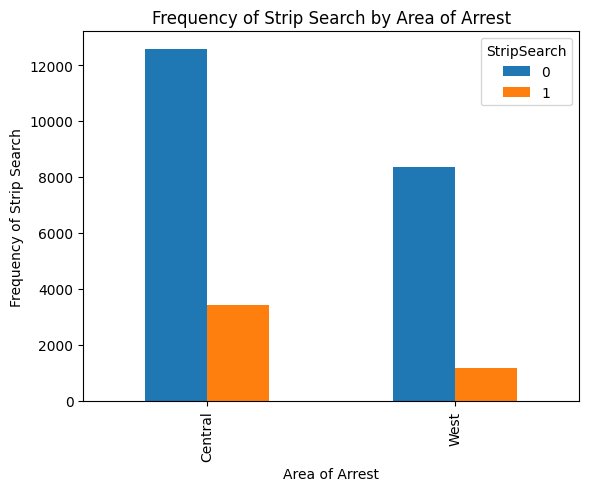

In [ ]:
# Create bar chart for Area
pd.crosstab(df.Area, df.StripSearch).plot(kind='bar')
plt.title('Frequency of Strip Search by Area of Arrest')
plt.xlabel('Area of Arrest')
plt.ylabel('Frequency of Strip Search')

In [ ]:
# create contingency table for StripSearch and Area
contingency_table1=pd.crosstab(df['StripSearch'], df['Area'])
contingency_table1

Area,Central,West
StripSearch,,
0,12574,8371
1,3429,1174


In [ ]:
# Conduct chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table1)
significance = 0.05
print("p-value is ", p, "significance = ", significance)
if p < significance:
    print("""The p-value is less than 0.05. We reject the null hypotheses and accept H1. 
Strip Search is dependent on Area""")
else:
    print("""The p-value is greater than 0.05. We accept the null hypotheses and reject H1. Strip Search and Area are independent.""" )

p-value is  3.4888705928063125e-75 significance =  0.05
The p-value is less than 0.05. We reject the null hypotheses and accept H1. 
Strip Search is dependent on Area


In [ ]:
# Calculate Crammer V used to determine effect size for chi-squared test
n = contingency_table1.sum().sum() # determine total records
V = np.sqrt(chi2 / (n * dof))
print("Effect size for Area is ", V) #Small Effect but statistically significant on Strip Search

Effect size for Area is  0.1147853517729875


Text(0, 0.5, 'Frequency of Strip Search')

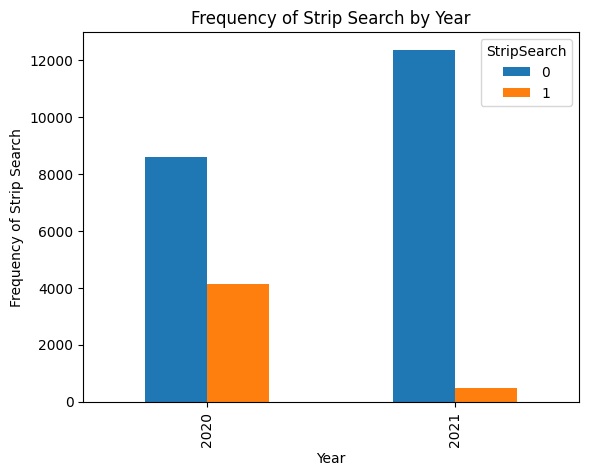

In [ ]:
# Create bar chart for Strip Search and Year
pd.crosstab(df.Arrest_Year, df.StripSearch).plot(kind='bar')
plt.title('Frequency of Strip Search by Year')
plt.xlabel('Year')
plt.ylabel('Frequency of Strip Search')

In [ ]:
# create contingency table for StripSearch and Arrest Year
contingency_table2=pd.crosstab(df['StripSearch'], df['Arrest_Year'])
contingency_table2

Arrest_Year,2020,2021
StripSearch,,
0,8584,12361
1,4131,472


In [ ]:
# Conduct chi-square test
chi2_a, p_a, dof_a, expected = chi2_contingency(contingency_table2)
significance = 0.05
print("p-value is ", p_a, "significance = ", significance)
if p_a < significance:
    print("""The p-value is less than 0.05. We reject the null hypotheses and accept H1. 
Strip Search is dependent on Arrest Year""")
else:
    print("""The p-value is greater than 0.05. We accept the null hypotheses and reject H1. Strip Search and Arrest Year are independent.""" )

p-value is  0.0 significance =  0.05
The p-value is less than 0.05. We reject the null hypotheses and accept H1. 
Strip Search is dependent on Arrest Year


In [ ]:
# Calculate Crammer V used to determine effect size for chi-squared test
n_a = contingency_table2.sum().sum() # determine total records
V = np.sqrt(chi2_a / (n_a * dof_a))
print("Effect size for Year is ", V) # strong effect size

Effect size for Year is  0.3747179158050107


In [ ]:
# Understand proportion of arrests that were strip searched
count_no_strip = len(df[df['StripSearch']==0])
count_strip = len(df[df['StripSearch']==1])
pct_of_no_strip = count_no_strip/(count_no_strip+count_strip)
print("percentage of no strip search is", pct_of_no_strip*100)
pct_of_strip = count_strip/(count_no_strip+count_strip)
print("percentage of strip search is", pct_of_strip*100)

percentage of no strip search is 81.98293408485988
percentage of no strip search is 18.01706591514013


## **Methodology Logistic Regression**

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from imblearn.over_sampling import SMOTE

In [ ]:
# Select independent features of interest
x= df1[[ "Area_West", "Arrest_Year_2020"]]

# Select dependent variable
y = df1['StripSearch']

In [ ]:
# Split data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=123)

In [ ]:
columns= x_train.columns

In [ ]:
# run SMOTE to balance training data
sm = SMOTE(random_state = 0)
sm_x_train, sm_y_train = sm.fit_resample(x_train,y_train)
print('After OverSampling, the length of train_X: {}'.format(sm_x_train.shape))
print('After OverSampling, the length of train_y: {} \n'.format(sm_y_train.shape))
  
print("After OverSampling, counts of StripSearch '1': {}".format(sum(sm_y_train == 1)))
print("After OverSampling, counts of StripSearch '0': {}".format(sum(sm_y_train == 0)))

After OverSampling, the length of train_X: (29330, 2)
After OverSampling, the length of train_y: (29330,) 

After OverSampling, counts of StripSearch '1': 14665
After OverSampling, counts of StripSearch '0': 14665


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
lr1 = LogisticRegression()
lr1.fit(sm_x_train, sm_y_train.ravel())
predictions = lr1.predict(x_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.60      0.74      6280
           1       0.33      0.89      0.48      1385

    accuracy                           0.65      7665
   macro avg       0.64      0.74      0.61      7665
weighted avg       0.85      0.65      0.69      7665



In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(sm_y_train,sm_x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.600869
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.133     
Dependent Variable: StripSearch      AIC:              35250.9799
Date:               2023-04-08 22:35 BIC:              35267.5526
No. Observations:   29330            Log-Likelihood:   -17623.   
Df Model:           1                LL-Null:          -20330.   
Df Residuals:       29328            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Area_West        -1.2785   0.0256 -49.9161 0.0000 -1.3287 -1.2283
Arrest_Year_2020  1.2392   0.0192  64.5443 0.0000  1.2016  1.2768


In [ ]:
# Calculate odds ratio 
np.exp(result.params)

Area_West           0.278454
Arrest_Year_2020    3.452857
dtype: float64

In [ ]:
# odds of strip search is 3 times higher if you were arrested in 2020 than 2021
# odds of strip search is 72% lower if arrested in West Toronto than Central Toronto (1-0.28= 0.72), out of 100 strip searches 28 will happen

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
pred_1 = result.predict(x_test)
# round() rounds to nearest integer;
prediction_1 = list(map(round, pred_1))
test_accuracy = accuracy_score(y_test, prediction_1)

In [ ]:
# Accuracy score
print('Test accuracy = ', test_accuracy)

Test accuracy =  0.7483365949119374


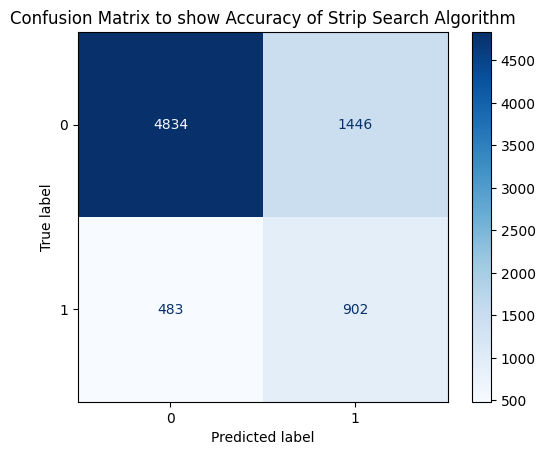

In [ ]:
#display confusion matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, prediction_1)

display_confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

display_confusion_matrix.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix to show Accuracy of Strip Search Algorithm')
plt.show()

# **Research Question 2 Has there been a change in the frequency of strip searches conducted during arrests between 2020 and 2021 after controlling items found rate during a strip search?**


## **Import packages**

In [ ]:
# Import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.power import FTestAnovaPower
from sklearn import linear_model
import seaborn as sns
from scipy.stats import skew

!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Cleaning and Pre-process dataset**

In [ ]:
#import dataset
data = pd.read_excel("/content/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).xlsx")

In [ ]:
data.columns = ["Arrest_Year","Arrest_Month","EventID","ArrestID","PersonID","Perceived_Race","Sex","Age_group__at_arrest_","Youth_at_arrest__under_18_years","ArrestLocDiv","StripSearch","Booked","Occurrence_Category","Actions_at_arrest___Concealed_i","Actions_at_arrest___Combative__","Actions_at_arrest___Resisted__d","Actions_at_arrest___Mental_inst","Actions_at_arrest___Assaulted_o","Actions_at_arrest___Cooperative","SearchReason_CauseInjury","SearchReason_AssistEscape","SearchReason_PossessWeapons","SearchReason_PossessEvidence","ItemsFound","ObjectId"]
data.style.hide_index()
data=data.drop([0])
data.head()

<ipython-input-4-b7e78562b782>:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  data.style.hide_index()


,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
1,2020,July-Sept,1005907,6017884,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
2,2020,July-Sept,1014562,6056669,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
3,2020,Oct-Dec,1029922,6057065,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
4,2021,Jan-Mar,1052190,6029059,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
5,2021,Jan-Mar,1015512,6040372,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
#fliter columns for analysis
data= data[["EventID","Arrest_Year","ArrestLocDiv","ItemsFound","StripSearch"]]
data.head()

,EventID,Arrest_Year,ArrestLocDiv,ItemsFound,StripSearch
1,1005907,2020,54,NaN,0
2,1014562,2020,54,NaN,0
3,1029922,2020,54,NaN,0
4,1052190,2021,XX,NaN,0
5,1015512,2021,XX,NaN,0


In [ ]:
data["ArrestLocDiv"].unique()

array([54, 'XX', 42, 52, 14, 51, 53, 31, 11, 12, 13, 41, 22, 55, 43, 23,
       33, 32], dtype=object)

In [ ]:
data = data[(data["ArrestLocDiv"]!='XX')]

In [ ]:
data['ItemsFound'] = data['ItemsFound'].fillna(0)

<ipython-input-8-b86ba00b9a56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ItemsFound'] = data['ItemsFound'].fillna(0)


In [ ]:
Num_StripResearch=data.groupby(['ArrestLocDiv','Arrest_Year'])['StripSearch'].sum().reset_index(name="Num_Strip")
Num_StripResearch.head()

,ArrestLocDiv,Arrest_Year,Num_Strip
0,11,2020,205
1,11,2021,17
2,12,2020,278
3,12,2021,7
4,13,2020,128


In [ ]:
#Determine number of arrests by police division and race
arrests=data.groupby(['ArrestLocDiv','Arrest_Year'])['ArrestLocDiv'].count().reset_index(name="Num_Arrests")
arrests.head()

,ArrestLocDiv,Arrest_Year,Num_Arrests
0,11,2020,908
1,11,2021,881
2,12,2020,983
3,12,2021,919
4,13,2020,534


In [ ]:
#Determine number of items found by police division and race
itemfound=data.groupby(['ArrestLocDiv','Arrest_Year'])['ItemsFound'].sum().reset_index(name="Num_ItemFound")
itemfound.head()

,ArrestLocDiv,Arrest_Year,Num_ItemFound
0,11,2020,95
1,11,2021,1
2,12,2020,121
3,12,2021,0
4,13,2020,55


In [ ]:
# Join two tables
join=pd.merge(arrests,itemfound)
join.head()

,ArrestLocDiv,Arrest_Year,Num_Arrests,Num_ItemFound
0,11,2020,908,95
1,11,2021,881,1
2,12,2020,983,121
3,12,2021,919,0
4,13,2020,534,55


In [ ]:
join1=pd.merge(join,Num_StripResearch)
join1.head()


,ArrestLocDiv,Arrest_Year,Num_Arrests,Num_ItemFound,Num_Strip
0,11,2020,908,95,205
1,11,2021,881,1,17
2,12,2020,983,121,278
3,12,2021,919,0,7
4,13,2020,534,55,128


In [ ]:
join1.info

<bound method DataFrame.info of     ArrestLocDiv  Arrest_Year  Num_Arrests  Num_ItemFound Num_Strip
0             11         2020          908             95       205
1             11         2021          881              1        17
2             12         2020          983            121       278
3             12         2021          919              0         7
4             13         2020          534             55       128
5             13         2021          568              0         6
6             14         2020         1499            246       626
7             14         2021         1618              6       131
8             22         2020          922             78       183
9             22         2021          928              1         7
10            23         2020          842             50       142
11            23         2021          896              3        35
12            31         2020         1106            110       288
13            31

In [ ]:
# Calculate Strip Search Rate
join1["ItemFoundRate"]= join1["Num_ItemFound"].div(join1["Num_Strip"])
join1.head()

,ArrestLocDiv,Arrest_Year,Num_Arrests,Num_ItemFound,Num_Strip,ItemFoundRate
0,11,2020,908,95,205,0.463415
1,11,2021,881,1,17,0.058824
2,12,2020,983,121,278,0.435252
3,12,2021,919,0,7,0.0
4,13,2020,534,55,128,0.429688


In [ ]:
# Calculate Strip Search Rate
join1["StripRate"]= join1["Num_Strip"].div(join1["Num_Arrests"])
join1.head()

,ArrestLocDiv,Arrest_Year,Num_Arrests,Num_ItemFound,Num_Strip,ItemFoundRate,StripRate
0,11,2020,908,95,205,0.463415,0.225771
1,11,2021,881,1,17,0.058824,0.019296
2,12,2020,983,121,278,0.435252,0.282808
3,12,2021,919,0,7,0.0,0.007617
4,13,2020,534,55,128,0.429688,0.2397


In [ ]:
join1.head(34)

,ArrestLocDiv,Arrest_Year,Num_Arrests,Num_ItemFound,Num_Strip,ItemFoundRate,StripRate
0,11,2020,908,95,205,0.463415,0.225771
1,11,2021,881,1,17,0.058824,0.019296
2,12,2020,983,121,278,0.435252,0.282808
3,12,2021,919,0,7,0.0,0.007617
4,13,2020,534,55,128,0.429688,0.2397
5,13,2021,568,0,6,0.0,0.010563
6,14,2020,1499,246,626,0.392971,0.417612
7,14,2021,1618,6,131,0.045802,0.080964
8,22,2020,922,78,183,0.42623,0.198482
9,22,2021,928,1,7,0.142857,0.007543


In [ ]:
join1.skew()

ArrestLocDiv    -0.156214
Arrest_Year      0.000000
Num_Arrests      1.851385
Num_ItemFound    3.832414
Num_Strip        2.833065
ItemFoundRate    0.053134
StripRate        0.592758
dtype: float64

In [ ]:
join1['ArrestLocDiv'].unique()

array([11, 12, 13, 14, 22, 23, 31, 32, 33, 41, 42, 43, 51, 52, 53, 54, 55])

In [ ]:
value_map = {'11': 'West','12':'West','13': 'Central','14':'Central','22':'West','23':'West','31': 'West','32':'Central','33':'Central','41':'East', '42': 'East','43':'East','51':'Central', '52': 'Central','53':'Central','54': 'East', '55':'East'}
join1['Area'] = join1['ArrestLocDiv'].astype(str).map(value_map)
join1.loc[:,['Area', 'ArrestLocDiv']]

,Area,ArrestLocDiv
0,West,11
1,West,11
2,West,12
3,West,12
4,Central,13
5,Central,13
6,Central,14
7,Central,14
8,West,22
9,West,22


In [ ]:
join1.head(35)

,ArrestLocDiv,Arrest_Year,Num_Arrests,Num_ItemFound,Num_Strip,ItemFoundRate,StripRate,Area
0,11,2020,908,95,205,0.463415,0.225771,West
1,11,2021,881,1,17,0.058824,0.019296,West
2,12,2020,983,121,278,0.435252,0.282808,West
3,12,2021,919,0,7,0.000000,0.007617,West
4,13,2020,534,55,128,0.429688,0.239700,Central
5,13,2021,568,0,6,0.000000,0.010563,Central
6,14,2020,1499,246,626,0.392971,0.417612,Central
7,14,2021,1618,6,131,0.045802,0.080964,Central
8,22,2020,922,78,183,0.426230,0.198482,West
9,22,2021,928,1,7,0.142857,0.007543,West


## **Exploratory data analysis (EDA)**

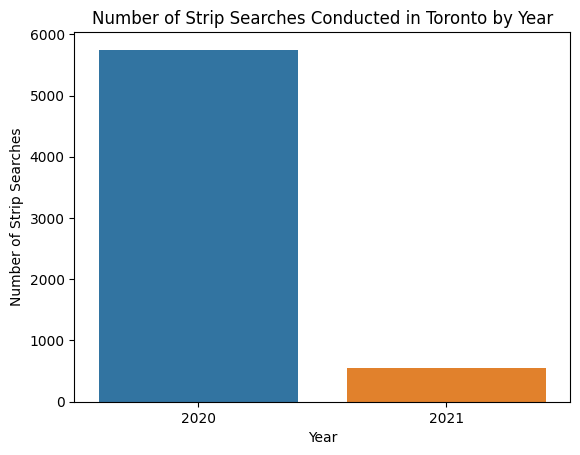

In [ ]:
# Group the data by year and count the number of strip searches in each year
counts = data.groupby('Arrest_Year')['StripSearch'].sum()

# Plot the results as a bar chart
sns.barplot(x=counts.index, y=counts.values)
plt.title('Number of Strip Searches Conducted in Toronto by Year')
plt.xlabel('Year')
plt.ylabel('Number of Strip Searches')
plt.show()

Text(0, 0.5, 'Frequency')

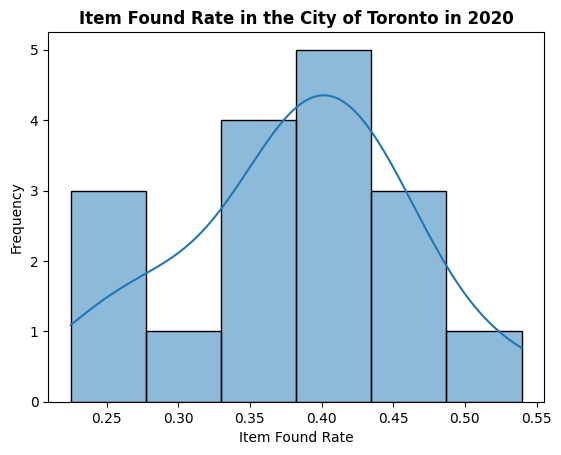

In [ ]:
# Create histogram for 2020 Item Found Rate 
sns.histplot(data=join1[join1['Arrest_Year']==2020], x='ItemFoundRate', kde=True)
plt.title('Item Found Rate in the City of Toronto in 2020', fontweight='bold')
plt.xlabel('Item Found Rate')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

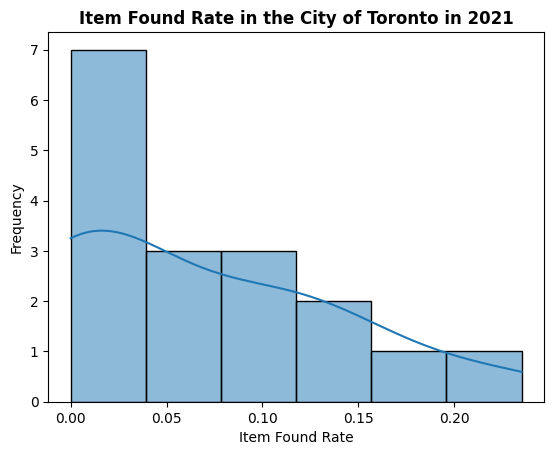

In [ ]:
# Create histogram for 2021 Item Found Rate
sns.histplot(data=join1[join1['Arrest_Year']==2021], x='ItemFoundRate', kde=True)
plt.title('Item Found Rate in the City of Toronto in 2021', fontweight='bold')
plt.xlabel('Item Found Rate')
plt.ylabel('Frequency')

In [ ]:
# Convert the 'ItemFoundRate' column to float
join1['ItemFoundRate'] = join1['ItemFoundRate'].astype(float)

# Skewness for year 2020
skew_2020 = skew(join1.loc[join1['Arrest_Year'] == 2020, 'ItemFoundRate'])
print('Skewness of Item Found Rate for year 2020:', skew_2020)

# Skewness for year 2021
skew_2021 = skew(join1.loc[join1['Arrest_Year'] == 2021, 'ItemFoundRate'])
print('Skewness of Item Found Rate for year 2021:', skew_2021)

Skewness of Item Found Rate for year 2020: -0.22441027844312023
Skewness of Item Found Rate for year 2021: 0.7741752036914592


Text(0, 0.5, 'Frequency')

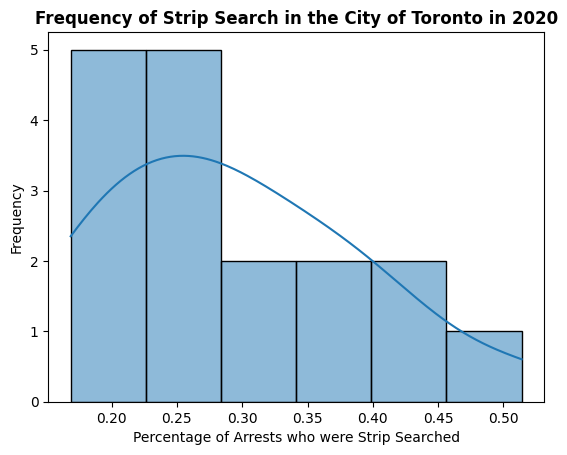

In [ ]:
# Create histogram for 2020 Strip Search Rate
sns.histplot(data=join1[join1['Arrest_Year']==2020], x='StripRate', kde=True)
plt.title('Frequency of Strip Search in the City of Toronto in 2020', fontweight='bold')
plt.xlabel('Percentage of Arrests who were Strip Searched')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

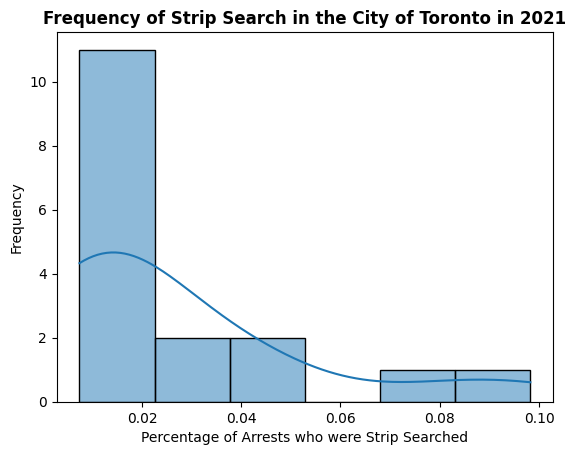

In [ ]:
# Create histogram for 2021 Strip Search Rate
sns.histplot(data=join1[join1['Arrest_Year']==2021], x='StripRate', kde=True)
plt.title('Frequency of Strip Search in the City of Toronto in 2021', fontweight='bold')
plt.xlabel('Percentage of Arrests who were Strip Searched')
plt.ylabel('Frequency')

In [ ]:
# Convert the 'Strip Search' column to float
join1['StripRate'] = join1['StripRate'].astype(float)

# Skewness for year 2020
skew_2020 = skew(join1.loc[join1['Arrest_Year'] == 2020, 'StripRate'])
print('Skewness of Strip Searh Rate for year 2020:', skew_2020)

# Skewness for year 2021
skew_2021 = skew(join1.loc[join1['Arrest_Year'] == 2021, 'StripRate'])
print('Skewness of Strip Searh Rate for year 2021:', skew_2021)

Skewness of Strip Searh Rate for year 2020: 0.5779381764842355
Skewness of Strip Searh Rate for year 2021: 1.6091525552655097


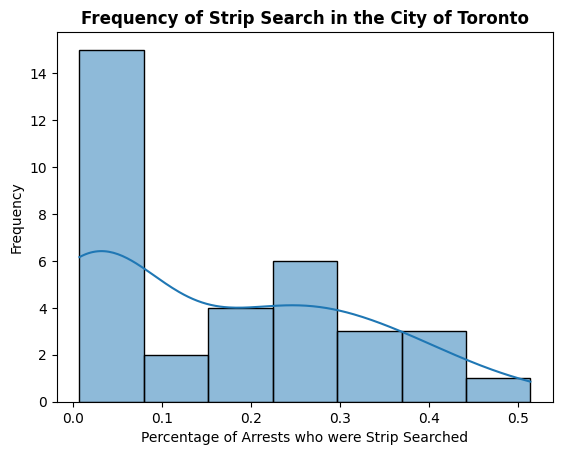

In [ ]:
sns.histplot(data=join1, x='StripRate', kde=True)
plt.title('Frequency of Strip Search in the City of Toronto', fontweight='bold')
plt.xlabel('Percentage of Arrests who were Strip Searched')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Calculate skew of StripRate and ItemFoundRate
strip_skew = skew(join1['StripRate'])
item_found_skew = skew(join1['ItemFoundRate'])

print('Strip Search Rate skewness:', strip_skew)
print('Item Found Rate skewness:', item_found_skew)

Strip Search Rate skewness: 0.5662800561428977
Item Found Rate skewness: 0.05076070302234299


Text(0.5, 1.0, 'Distribution of Item Found Rates')

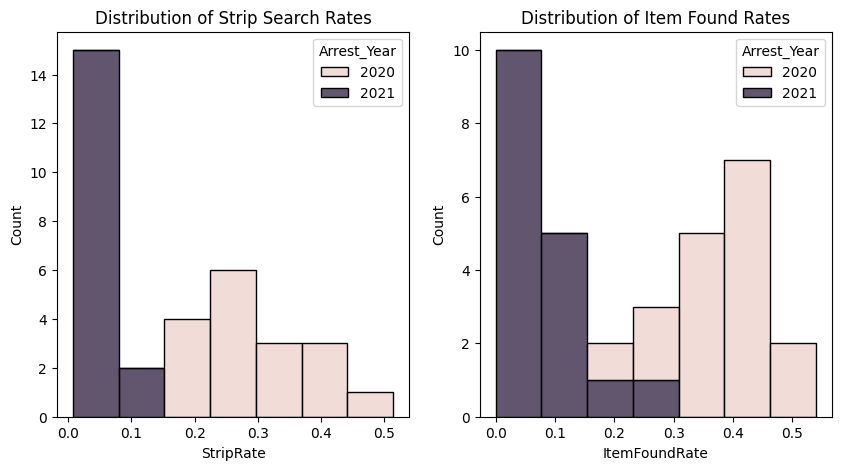

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=join1, x='StripRate', hue='Arrest_Year', multiple='stack', ax=ax[0])
sns.histplot(data=join1, x='ItemFoundRate', hue='Arrest_Year', multiple='stack', ax=ax[1])
ax[0].set_title('Distribution of Strip Search Rates')
ax[1].set_title('Distribution of Item Found Rates')

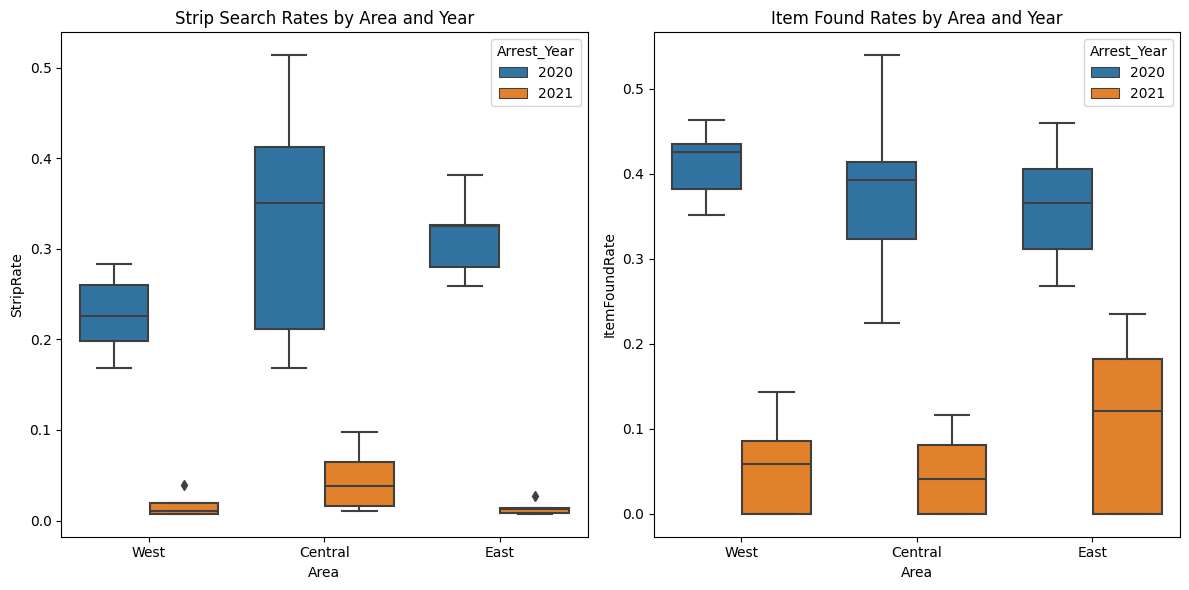

In [ ]:
# Plot strip search rate and item found rate by area and year
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=join1, x='Area', y='StripRate', hue='Arrest_Year', ax=ax[0])
sns.boxplot(data=join1, x='Area', y='ItemFoundRate', hue='Arrest_Year', ax=ax[1])
ax[0].set_title('Strip Search Rates by Area and Year')
ax[1].set_title('Item Found Rates by Area and Year')
plt.tight_layout()
plt.show()

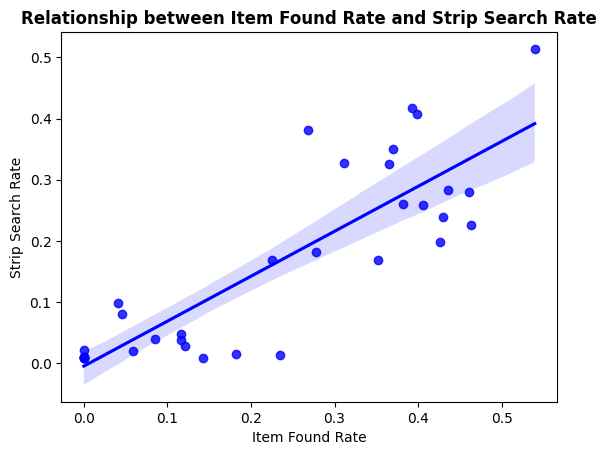

In [ ]:
sns.regplot(x='ItemFoundRate', y='StripRate', data=join1, color='blue')

plt.title('Relationship between Item Found Rate and Strip Search Rate', fontweight='bold')
plt.xlabel('Item Found Rate')
plt.ylabel('Strip Search Rate')

plt.show()

In [ ]:
# Subset the data for 2020 and 2021
data_2020 = join1[join1['Arrest_Year'] == 2020]
data_2021 = join1[join1['Arrest_Year'] == 2021]

# Conduct t-test
t_stat, p_val = stats.ttest_ind(data_2020['StripRate'], data_2021['StripRate'], equal_var=True)

print(f"t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

t-statistic: 10.84, p-value: 0.0000


In [ ]:
# Subset the data for 2020 and 2021
data_2020 = join1[join1['Arrest_Year'] == 2020]
data_2021 = join1[join1['Arrest_Year'] == 2021]

# Conduct t-test
t_stat, p_val = stats.ttest_ind(data_2020['ItemFoundRate'], data_2021['ItemFoundRate'], equal_var=True)

print(f"t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

t-statistic: 11.97, p-value: 0.0000


In [ ]:
# Fit ANCOVA model
model = ols('StripRate ~ Arrest_Year + ItemFoundRate', data=join1).fit()

# Calculate eta-squared
eta_sq = sm.stats.anova_lm(model, typ=2)['sum_sq'][0] / (sm.stats.anova_lm(model, typ=2)['sum_sq'][0] + sm.stats.anova_lm(model, typ=2)['sum_sq'][1])

print('Eta-squared:', eta_sq)

Eta-squared: 0.8351692164320068


In [ ]:
# Set effect size, alpha, power, and sample size
effect_size = 0.8351692164320068
alpha = 0.05
power = 0.8
nobs = 33

# Create F-test ANOVA power object
ftest = FTestAnovaPower()

# Calculate power
actual_power = ftest.solve_power(effect_size=effect_size, nobs=nobs, alpha=alpha, power=None)

print("Required sample size: ", ftest.solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs=None))
print("Actual power: ", actual_power)

Required sample size:  13.473396973788134
Actual power:  0.9963682493358597


## **Methodology ANCOVA (Analysis of Covariance) test**

In [ ]:
# Fit the ANCOVA model
model = ols('StripRate ~ Arrest_Year + ItemFoundRate', data=join1).fit()

# Check for linearity assumption
fig = plt.figure(figsize=(12,8))

# Scatter plot
ax1 = fig.add_subplot(2,2,1)
sns.regplot(x=model.fittedvalues, y=join1['StripRate'], ax=ax1)
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Observed values')
ax1.set_title('Scatter plot')

# Histogram of residuals
ax2 = fig.add_subplot(2,2,2)
sns.histplot(x=model.resid, ax=ax2)
ax2.set_xlabel('Residuals')
ax2.set_title('Histogram of residuals')

# Normal probability plot of residuals
ax3 = fig.add_subplot(2,2,3)
sm.qqplot(model.resid, line='r', ax=ax3)
ax3.set_title('Normal probability plot of residuals')

# Partial regression plot
ax4 = fig.add_subplot(2,2,4)
sm.graphics.plot_partregress('StripRate', 'Arrest_Year', exog_others=['ItemFoundRate'], data=join1, ax=ax4)
ax4.set_title('Partial regression plot')

plt.tight_layout()
plt.show()

# Check for homoscedasticity assumption
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x=model.fittedvalues, y=model.resid, ax=ax)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Homoscedasticity assumption check')
plt.show()

# Check for normality assumption
sm.qqplot(model.resid, line='r')
plt.title('Normality assumption check')
plt.show()

# Check for independence assumption
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x=model.fittedvalues, y=np.abs(model.resid)**0.5, ax=ax)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Square root of absolute residuals')
ax.set_title('Independence assumption check')
plt.show()

In [ ]:
# Check for multicollinearity assumption
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(join1[['Arrest_Year', 'ItemFoundRate']].values, i) for i in range(2)]
vif["features"] = ['Arrest_Year', 'ItemFoundRate']
print(vif)

   VIF Factor       features
0     2.66375    Arrest_Year
1     2.66375  ItemFoundRate


In [ ]:
# Fit ANCOVA model with Arrest_Year and ItemFoundRate as independent variables, and StripRate as the dependent variable
model = ols('StripRate ~ Arrest_Year + ItemFoundRate', data=join1).fit()

# Check the ANCOVA model results
results = sm.stats.anova_lm(model, typ=2)
print(results)

                 sum_sq    df          F    PR(>F)
Arrest_Year    0.056081   1.0  11.351533  0.002030
ItemFoundRate  0.011068   1.0   2.240363  0.144563
Residual       0.153152  31.0        NaN       NaN
